In [1]:
import import_ipynb

from preprocessing import *
from learning_utils import *

if torch.cuda.is_available():
    cuda = torch.device('cuda:0')

importing Jupyter notebook from preprocessing.ipynb
importing Jupyter notebook from learning_utils.ipynb


In [2]:
ROOT = os.getcwd()
IMAGE_DIR = os.path.join(ROOT, "images/")
URL_FILE = os.path.join(ROOT, "urls.txt")
N = 200

get_images(URL_FILE, N, IMAGE_DIR)

1869 samples in total. Correctly identified: 1186, accuracy: 0.635
208 samples in total. Correctly identified: 138, accuracy: 0.663


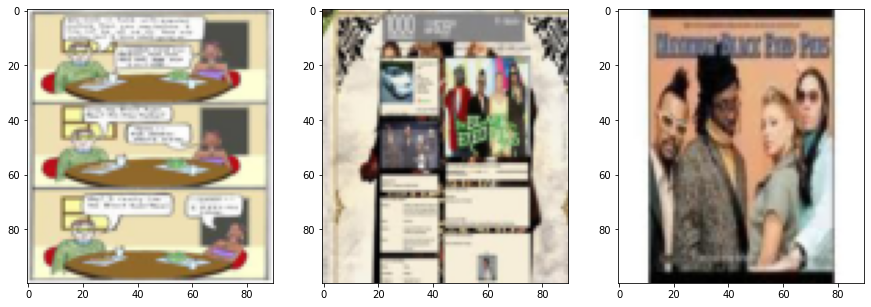

In [3]:
DIMS = (100, 90)
TRAIN_PROPORTION = 0.9
samples = ImageDataset(IMAGE_DIR, DIMS)
model = cnn()
model = model.to(cuda)
samples = to_cuda(samples)
TRAIN_SIZE = int(TRAIN_PROPORTION * samples.size)
train_set = samples[:TRAIN_SIZE]
test_set = samples[TRAIN_SIZE:]

# model.load_state_dict(torch.load('params'))
samples.display(9)
evaluate(model, train_set, p_dist=2)
evaluate(model, test_set, p_dist=2)

In [124]:
learning_rate = 0.001
p_dist = 2
optimizer = optim.Adamax(model.parameters(), lr=learning_rate)
train(model, train_set, test_set, optimizer, n_epochs=2, g=1000, p_dist=p_dist)


Epoch 1 completed.
998 samples in total. Correctly identified: 611, accuracy: 0.612
111 samples in total. Correctly identified: 77, accuracy: 0.694
Epoch 2 completed.
998 samples in total. Correctly identified: 973, accuracy: 0.975
111 samples in total. Correctly identified: 109, accuracy: 0.982
Epoch 3 completed.
998 samples in total. Correctly identified: 998, accuracy: 1.000
111 samples in total. Correctly identified: 110, accuracy: 0.991


KeyboardInterrupt: 

In [10]:
PARAMS_FILE = os.path.join(ROOT, 'params')
torch.save(model.state_dict(), PARAMS_FILE)